# Python API

This notebook demonstrates how to set up a Jetto interpretive simulation and run it via duqtools.

In [1]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format='%(message)s',
)

Below is an example duqtools config.

The example below takes `t_e` (electron temperature) from the template, and multiplies it by 1.1.

It also sets a few machine specific parameters (`major_radius`, `b_field`), and adjusts the start (`t_start`) and end time (`t_end`) for the simulation.

For more documentation on the parameters, check out the documentation here:
https://duqtools.readthedocs.io/en/latest/config/create/

In [2]:
from duqtools.api import create

config = {
    'tag': 'data_01',
    'create': {
        'runs_dir':
        '/afs/eufus.eu/user/g/g2ssmee/jetto_runs/duqduq/data_123',
        'template':
        '/afs/eufus.eu/user/g/g2ssmee/jetto_runs/interpretive_esco02',
        'template_data': {
            'user': 'g2aho',
            'db': 'aug',
            'shot': 36982,
            'run': 2,
        },
        'operations': [
            {
                'variable': 't_e',
                'operator': 'multiply',
                'value': 1.1,
            },
            {
                'variable': 'major_radius',
                'operator': 'copyto',
                'value': 165.0,
            },
            {
                'variable': 'b_field',
                'operator': 'copyto',
                'value': -2.5725,
            },
            {
                'variable': 't_start',
                'operator': 'copyto',
                'value': 2.875,
            },
            {
                'variable': 't_end',
                'operator': 'copyto',
                'value': 2.885,
            },
        ],
    },
    'system': 'jetto',
}

13:45:22 [WARNING] Python module 'omas' not found. Submodule 'jams' needs it @jams.py:14
Python module 'omas' not found. Submodule 'jams' needs it
13:45:22 [WARNING] Python module 'netCDF4' not found. Submodule 'transp' needs it @transp.py:25
Python module 'netCDF4' not found. Submodule 'transp' needs it


Running `create` will create a new run from the template, copy over the template data, and apply the operations to the data. This will return a dictionary with jobs and runs (`Job` and `Run` objects).

In [3]:
jobs_and_runs = create(config)
job, run = jobs_and_runs['run_0000']

Source data: g2aho/aug/36982/2
- Creating run : /afs/eufus.eu/user/g/g2ssmee/jetto_runs/duqduq/data_123/run_0000
- Copy ids from template to : /gss_efgw_work/work/g2ssmee/jetto/runs/duqduq/data_123/run_0000/imasdb/aug/36982/1
- Copying template to : /afs/eufus.eu/user/g/g2ssmee/jetto_runs/duqduq/data_123/run_0000
- Setting inital condition of : /gss_efgw_work/work/g2ssmee/jetto/runs/duqduq/data_123/run_0000/imasdb/aug/36982/1
Apply operator='multiply' scale_to_error=False variable=IDSVariableModel(ids='core_profiles', path='profiles_1d/*/electrons/temperature', type='IDS-variable', name='t_e', dims=['time', '$rho_tor_norm']) value=1.1
Writing data entry: /gss_efgw_work/work/g2ssmee/jetto/runs/duqduq/data_123/run_0000/imasdb/aug/36982/1
- Writing new batchfile : run_0000
- Updating imas locations of : /afs/eufus.eu/user/g/g2ssmee/jetto_runs/duqduq/data_123/run_0000
- Writing runs : /afs/eufus.eu/g2itmuse/user/g2ssmee/duqtools/docs/examples/runs.yaml
- Writing csv


`run` contains some metadata about the run and the locations to the input and output data for the run.

In [4]:
run.dict()

{'dirname': PosixPath('/afs/eufus.eu/user/g/g2ssmee/jetto_runs/duqduq/data_123/run_0000'),
 'shortname': PosixPath('run_0000'),
 'data_in': {'relative_location': None,
  'user': '/gss_efgw_work/work/g2ssmee/jetto/runs/duqduq/data_123/run_0000/imasdb',
  'db': 'aug',
  'shot': 36982,
  'run': 1},
 'data_out': {'relative_location': None,
  'user': '/gss_efgw_work/work/g2ssmee/jetto/runs/duqduq/data_123/run_0000/imasdb',
  'db': 'aug',
  'shot': 36982,
  'run': 2},
 'operations': [{'operator': 'multiply',
   'scale_to_error': False,
   'variable': {'ids': 'core_profiles',
    'path': 'profiles_1d/*/electrons/temperature',
    'type': 'IDS-variable',
    'name': 't_e',
    'dims': ['time', '$rho_tor_norm']},
   'value': 1.1},
  {'operator': 'copyto',
   'scale_to_error': False,
   'variable': {'type': 'jetto-variable',
    'name': 'major_radius',
    'lookup': {'doc': 'Reference major radius (R0)',
     'name': 'major_radius',
     'type': 'float',
     'keys': [{'file': 'jetto.jset',
    

`job` contains information about the status of the job and the locations of the input and output files for the simulation.

In [5]:
print(job.in_file)
print(job.in_file.exists())
print(job.out_file)
print(job.out_file.exists())
print(job.status())

/gss_efgw_work/work/g2ssmee/jetto/runs/duqduq/data_123/run_0000/jetto.in
True
/gss_efgw_work/work/g2ssmee/jetto/runs/duqduq/data_123/run_0000/jetto.out
False
JobStatus.NOSTATUS


The `job` can be submitted using the configured submit system.

In [6]:
job.submit()

submitting script via slurm ['sbatch', '/gss_efgw_work/work/g2ssmee/jetto/runs/duqduq/data_123/run_0000/.llcmd']
submission returned: b'Submitted batch job 237647\n'


Track the status of the job through `job.status()`.

In [7]:
import time

print(job.status())

t0 = time.time()

while not job.is_done:
    t1 = time.time() - t0
    print(f'{t1:10.2f} - {job.status()}')
    time.sleep(1)

print(job.status())

JobStatus.NOSTATUS
      0.00 - no status
      1.00 - no status
      2.14 - no status
      3.14 - no status
      4.14 - no status
      5.14 - no status
      6.15 - no status
      7.15 - no status
      8.15 - no status
      9.15 - no status
     11.12 - no status
     13.23 - no status
     15.03 - running
     16.17 - running
     17.17 - running
     18.17 - running
     19.18 - running
     20.18 - running
     21.18 - running
     22.18 - running
     23.18 - running
     24.18 - running
     25.19 - running
     26.19 - running
     27.19 - running
     28.19 - running
     29.19 - running
     30.19 - running
     31.20 - running
     32.20 - running
     33.20 - running
     34.20 - running
     35.20 - running
     36.20 - running
     37.20 - running
     38.21 - running
JobStatus.COMPLETED


Check that the run has created some data.

In [8]:
run.data_out.exists()

True

Load the data into an `xarray.Dataset` and do things with it.

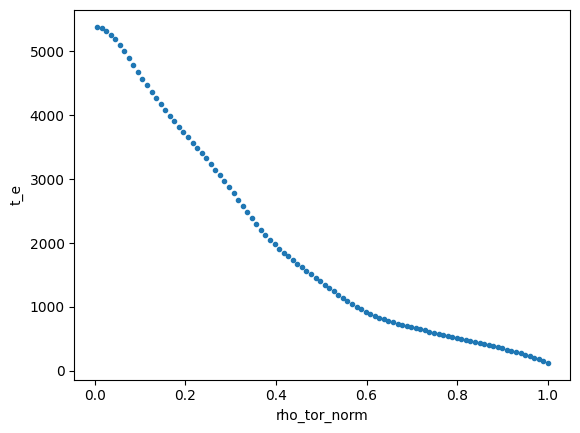

In [9]:
ds_out = run.data_out.get_variables(('time', 'rho_tor_norm', 't_e'))

ds_out.isel(time=[
    0,
]).plot.scatter('rho_tor_norm', 't_e', marker='.')